In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
data = pd.read_csv('/content/GOOG.csv', date_parser=True)

In [3]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4257,2021-07-19,2623.110107,2624.939941,2570.739990,2585.080078,2585.080078,1285500
4258,2021-07-20,2600.080078,2640.027100,2583.768066,2622.030029,2622.030029,954200
4259,2021-07-21,2615.739990,2652.344971,2612.030029,2652.010010,2652.010010,737100
4260,2021-07-22,2653.000000,2670.090088,2648.000000,2666.570068,2666.570068,680400
4261,2021-07-23,2705.199951,2776.169922,2694.010010,2756.320068,2756.320068,1317200


In [4]:
  data_training = data[data['Date'] < '2020-07-01'].copy()

In [5]:
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
3989,2020-06-24,1461.510010,1475.420044,1429.750000,1431.969971,1431.969971,1756000
3990,2020-06-25,1429.900024,1442.900024,1420.000000,1441.329956,1441.329956,1230500
3991,2020-06-26,1431.390015,1433.449951,1351.989990,1359.900024,1359.900024,4267700
3992,2020-06-29,1358.180054,1395.599976,1347.010010,1394.969971,1394.969971,1810200


In [6]:
  data_test = data[data['Date'] >= '2020-07-01'].copy()

In [7]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3994,2020-07-01,1411.099976,1443.000000,1409.819946,1438.040039,1438.040039,1775200
3995,2020-07-02,1446.939941,1482.949951,1446.420044,1464.699951,1464.699951,1859100
3996,2020-07-06,1480.060059,1506.589966,1472.859985,1495.699951,1495.699951,1564000
3997,2020-07-07,1490.000000,1516.800049,1483.550049,1485.180054,1485.180054,1458200
3998,2020-07-08,1494.319946,1505.880005,1485.630005,1496.000000,1496.000000,1249700
...,...,...,...,...,...,...,...
4257,2021-07-19,2623.110107,2624.939941,2570.739990,2585.080078,2585.080078,1285500
4258,2021-07-20,2600.080078,2640.027100,2583.768066,2622.030029,2622.030029,954200
4259,2021-07-21,2615.739990,2652.344971,2612.030029,2652.010010,2652.010010,737100
4260,2021-07-22,2653.000000,2670.090088,2648.000000,2666.570068,2666.570068,680400


In [8]:
training_data = data_training.drop(['Date', 'Adj Close'],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813290,51.835709,47.800831,49.982655,44871361
1,50.316402,54.336334,50.062355,53.952770,22942874
2,55.168217,56.528118,54.321388,54.495735,18342897
3,55.412300,55.591629,51.591621,52.239197,15319808
4,52.284027,53.798351,51.746044,52.802086,9232276


In [10]:
scaler = MinMaxScaler() # converts all values to be between 0 and 1
training_data = scaler.fit_transform(training_data)

In [23]:
x_train = []
y_train = []

In [24]:
for i in range(60,training_data.shape[0]):
  x_train.append(training_data[i-60: i])
  y_train.append(training_data[i,0])

In [25]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train.shape, y_train.shape

((3934, 60, 5), (3934,))

In [57]:
regressor = Sequential()
regressor.add(LSTM(units=60,activation='relu',return_sequences=True, input_shape =(x_train.shape[1], 5))) # return sequence ensures inputs are passed between the layers
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=60,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=80,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=120,activation='relu')) # no return sequence as final layer
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [58]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [59]:
regressor.fit(x_train, y_train, epochs=10,batch_size=32)

Epoch 1/10
123/123 [==============================] - 50s 374ms/step - loss: 0.0113
Epoch 2/10
123/123 [==============================] - 44s 357ms/step - loss: 0.0020
Epoch 3/10
123/123 [==============================] - 46s 374ms/step - loss: 0.0021
Epoch 4/10
123/123 [==============================] - 45s 362ms/step - loss: 0.0019
Epoch 5/10
123/123 [==============================] - 46s 376ms/step - loss: 0.0017
Epoch 6/10
123/123 [==============================] - 45s 369ms/step - loss: 0.0015
Epoch 7/10
123/123 [==============================] - 45s 366ms/step - loss: 0.0014
Epoch 8/10
123/123 [==============================] - 46s 374ms/step - loss: 0.0015
Epoch 9/10
123/123 [==============================] - 46s 371ms/step - loss: 0.0013
Epoch 10/10
123/123 [==============================] - 46s 375ms/step - loss: 0.0015


In [60]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3994,2020-07-01,1411.099976,1443.000000,1409.819946,1438.040039,1438.040039,1775200
3995,2020-07-02,1446.939941,1482.949951,1446.420044,1464.699951,1464.699951,1859100
3996,2020-07-06,1480.060059,1506.589966,1472.859985,1495.699951,1495.699951,1564000
3997,2020-07-07,1490.000000,1516.800049,1483.550049,1485.180054,1485.180054,1458200
3998,2020-07-08,1494.319946,1505.880005,1485.630005,1496.000000,1496.000000,1249700


In [61]:
data_training.tail(60) # to predict first record of test data u need to get past 60 days of data from tail of training dataset

,Date,Open,High,Low,Close,Adj Close,Volume
3934,2020-04-06,1138.000000,1194.660034,1130.939941,1186.920044,1186.920044,2664700
3935,2020-04-07,1221.000000,1225.000000,1182.229980,1186.510010,1186.510010,2387300
3936,2020-04-08,1206.500000,1219.069946,1188.160034,1210.280029,1210.280029,1975100
3937,2020-04-09,1224.079956,1225.569946,1196.734985,1211.449951,1211.449951,2175400
3938,2020-04-13,1209.180054,1220.510010,1187.598022,1217.560059,1217.560059,1739800
3939,2020-04-14,1245.089966,1282.069946,1236.930054,1269.229980,1269.229980,2470400
3940,2020-04-15,1245.609985,1280.459961,1240.400024,1262.469971,1262.469971,1671700
3941,2020-04-16,1274.099976,1279.000000,1242.619995,1263.469971,1263.469971,2518100
3942,2020-04-17,1284.849976,1294.430054,1271.229980,1283.250000,1283.250000,1949000
3943,2020-04-20,1271.000000,1281.599976,1261.369995,1266.609985,1266.609985,1695500


In [62]:
past_60_days = data_training.tail(60)

In [63]:
#append the past_60_days to the test set
df = past_60_days.append(data_test, ignore_index=True)

In [64]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-06,1138.000000,1194.660034,1130.939941,1186.920044,1186.920044,2664700
1,2020-04-07,1221.000000,1225.000000,1182.229980,1186.510010,1186.510010,2387300
2,2020-04-08,1206.500000,1219.069946,1188.160034,1210.280029,1210.280029,1975100
3,2020-04-09,1224.079956,1225.569946,1196.734985,1211.449951,1211.449951,2175400
4,2020-04-13,1209.180054,1220.510010,1187.598022,1217.560059,1217.560059,1739800
...,...,...,...,...,...,...,...
323,2021-07-19,2623.110107,2624.939941,2570.739990,2585.080078,2585.080078,1285500
324,2021-07-20,2600.080078,2640.027100,2583.768066,2622.030029,2622.030029,954200
325,2021-07-21,2615.739990,2652.344971,2612.030029,2652.010010,2652.010010,737100
326,2021-07-22,2653.000000,2670.090088,2648.000000,2666.570068,2666.570068,680400


In [65]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1138.000000,1194.660034,1130.939941,1186.920044,2664700
1,1221.000000,1225.000000,1182.229980,1186.510010,2387300
2,1206.500000,1219.069946,1188.160034,1210.280029,1975100
3,1224.079956,1225.569946,1196.734985,1211.449951,2175400
4,1209.180054,1220.510010,1187.598022,1217.560059,1739800


In [66]:
inputs = scaler.transform(df)
inputs

array([[0.73769709, 0.77221546, 0.73502966, 0.76993946, 0.03219022],
       [0.79394311, 0.7926957 , 0.76983562, 0.76966182, 0.02882917],
       [0.784117  , 0.78869277, 0.77385982, 0.78575667, 0.02383484],
       ...,
       [1.73910653, 1.7561897 , 1.74011306, 1.76196198, 0.00883491],
       [1.76435625, 1.7681681 , 1.76452266, 1.7718207 , 0.00814792],
       [1.79973021, 1.83977467, 1.79574554, 1.83259104, 0.01586355]])

In [67]:
x_test = []
y_test = []

In [68]:
for i in range(60, inputs.shape[0]):
  x_test.append(inputs[i-60:i])
  y_test.append(inputs[i, 0])

In [69]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape


((268, 60, 5), (268,))

In [70]:
y_pred = regressor.predict(x_test)

In [71]:
y_pred

array([[0.83201694],
       [0.8313887 ],
       [0.83067894],
       [0.83015734],
       [0.83003044],
       [0.8304142 ],
       [0.8313725 ],
       [0.83293164],
       [0.8350935 ],
       [0.83770615],
       [0.8406313 ],
       [0.8436975 ],
       [0.8467808 ],
       [0.8498564 ],
       [0.8529995 ],
       [0.8562303 ],
       [0.85947406],
       [0.86252725],
       [0.8652851 ],
       [0.8676505 ],
       [0.86958647],
       [0.87109107],
       [0.8721023 ],
       [0.87257874],
       [0.87250835],
       [0.8719241 ],
       [0.8709352 ],
       [0.8697052 ],
       [0.8683621 ],
       [0.8670037 ],
       [0.86571985],
       [0.8646296 ],
       [0.86379766],
       [0.86325943],
       [0.8630868 ],
       [0.8633454 ],
       [0.86407346],
       [0.86530924],
       [0.8670739 ],
       [0.8693311 ],
       [0.8720906 ],
       [0.87535965],
       [0.8790799 ],
       [0.8831467 ],
       [0.88745636],
       [0.89204276],
       [0.8968133 ],
       [0.901

In [72]:
scaler.scale_ # understand the scaling label to scale the output back

array([6.77662810e-04, 6.75025317e-04, 6.78610578e-04, 6.77106900e-04,
       1.21162615e-08])

In [73]:
# 1st column was divided by the below scaling value to make it between 1 and 0

scale = 1/6.77662810e-04

In [74]:
y_pred = y_pred * scale
y_test = y_test * scale

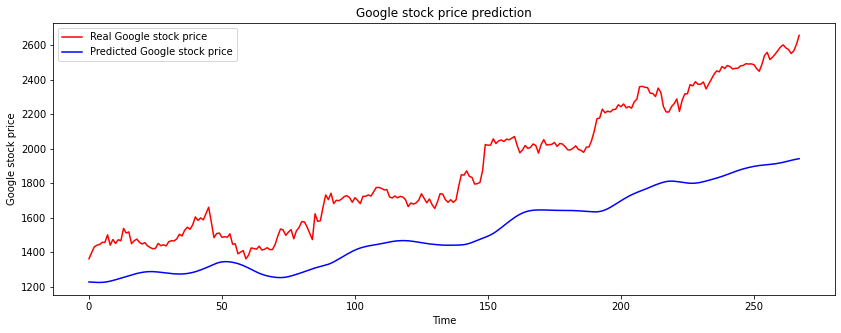

In [75]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color='red',label='Real Google stock price')
plt.plot(y_pred, color ='blue', label = 'Predicted Google stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()